In [1]:
import sys
import os
import polars as pl
import pandas as pd
import itables

current_dir = os.getcwd()
sys.path.append(os.path.join(current_dir, "../../", 'src'))

from config import Constants
from preprocessing.preprocessing import BigDataBowlData
from plotting.plotting import PlotPlayVertical
import seaborn as sns

# init_notebook_mode(all_interactive=True)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(100)


GAMES_FILE = "../../data/games.csv"
PLAYS_FILE = "../../data/plays.csv"
PLAYERS_FILE = "../../data/players.csv"
PLAYER_PLAYS_FILE = "../../data/player_play.csv"

# TRACKING_FILES = ["../../data/tracking_week_1.csv",
#                   "../../data/tracking_week_2.csv"
#                   ]

TRACKING_FILES = ["../../data/tracking_week_1.csv",
                  "../../data/tracking_week_2.csv",
                    "../../data/tracking_week_3.csv",
                    "../../data/tracking_week_4.csv",
                    "../../data/tracking_week_5.csv",
                    "../../data/tracking_week_6.csv",
                    "../../data/tracking_week_7.csv",
                    "../../data/tracking_week_8.csv",
                    "../../data/tracking_week_9.csv",
                  ]

data = BigDataBowlData(GAMES_FILE, 
                       PLAYS_FILE, 
                       PLAYERS_FILE, 
                       PLAYER_PLAYS_FILE, 
                       TRACKING_FILES)

IndentationError: expected an indented block after function definition on line 60 (preprocessing.py, line 61)

In a league where separation is vital, being able to send a player in motion at the time of the snap feels like a leg up. But 

In [23]:
data.\
    plays_df.\
        filter(pl.col("playType") == "pass").\
        group_by([pl.col("playType"), pl.col("playHadPlayersInMotionAtSnap")]).\
            agg(count=pl.count("playId"), 
                in_motion_at_snap_target_percentage = pl.mean("playerInMotionAtSnapWasTargetted"),
                avg_epa_added=pl.mean("expectedPointsAdded"), 
                median_epa_added = pl.median("expectedPointsAdded"),
                completion_percentage = (pl.col("passResult") == "C").sum() / pl.count("playId"),
                incomplete_percentage = (pl.col("passResult") == "I").sum() / pl.count("playId"),
                interception_percentage = (pl.col("passResult") == "IN").sum() / pl.count("playId"),
                sack_percentage = (pl.col("passResult") == "S").sum() / pl.count("playId"),
                scramble_percentage=(pl.col("passResult") == "R").sum() / pl.count("playId"),
                avg_yards_gained_after_catch=pl.col("yardsAfterCatch").cast(pl.Float64).mean(),
                ).\
        sort("playType").\
collect()

shape: (2, 12)
┌────────┬────────┬───────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ playTy ┆ playHa ┆ count ┆ in_mot ┆ avg_e ┆ media ┆ compl ┆ incom ┆ inter ┆ sack_ ┆ scram ┆ avg_y │
│ pe     ┆ dPlaye ┆ ---   ┆ ion_at ┆ pa_ad ┆ n_epa ┆ etion ┆ plete ┆ cepti ┆ perce ┆ ble_p ┆ ards_ │
│ ---    ┆ rsInMo ┆ u32   ┆ _snap_ ┆ ded   ┆ _adde ┆ _perc ┆ _perc ┆ on_pe ┆ ntage ┆ ercen ┆ gaine │
│ str    ┆ tionAt ┆       ┆ target ┆ ---   ┆ d     ┆ entag ┆ entag ┆ rcent ┆ ---   ┆ tage  ┆ d_aft │
│        ┆ Snap   ┆       ┆ _perce ┆ f64   ┆ ---   ┆ e     ┆ e     ┆ age   ┆ f64   ┆ ---   ┆ er_ca │
│        ┆ ---    ┆       ┆ …      ┆       ┆ f64   ┆ ---   ┆ ---   ┆ ---   ┆       ┆ f64   ┆ tch   │
│        ┆ bool   ┆       ┆ ---    ┆       ┆       ┆ f64   ┆ f64   ┆ f64   ┆       ┆       ┆ ---   │
│        ┆        ┆       ┆ f64    ┆       ┆       ┆       ┆       ┆       ┆       ┆       ┆ f64   │
╞════════╪════════╪═══════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ pass   ┆ true   ┆ 2385  ┆ 0.2373 ┆ 0.048 ┆ -0.15 ┆ 0.616 ┆ 0.272 ┆ 0.018 ┆ 0.055 ┆ 0.036 ┆ 3.610 │
│        ┆        ┆       ┆ 17     ┆ 977   ┆ 9179  ┆ 771   ┆ 537   ┆ 029   ┆ 765   ┆ 897   ┆ 482   │
│ pass   ┆ false  ┆ 7351  ┆ 0.0    ┆ -0.03 ┆ -0.22 ┆ 0.564 ┆ 0.307 ┆ 0.020 ┆ 0.064 ┆ 0.042 ┆ 2.825 │
│        ┆        ┆       ┆        ┆ 2469  ┆ 5525  ┆ 957   ┆ 577   ┆ 405   ┆ 617   ┆ 443   ┆ 194   │
└────────┴────────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┘

In [26]:
data.\
    plays_df.\
        filter(pl.col("playType") == "pass").\
        filter(pl.col("playHadPlayersInMotionAtSnap") == True).\
        group_by([pl.col("quarter")]).agg(count=pl.count("playId"),                 avg_epa_added=pl.mean("expectedPointsAdded"), 
).collect().sort("quarter")

shape: (5, 3)
┌─────────┬───────┬───────────────┐
│ quarter ┆ count ┆ avg_epa_added │
│ ---     ┆ ---   ┆ ---           │
│ i64     ┆ u32   ┆ f64           │
╞═════════╪═══════╪═══════════════╡
│ 1       ┆ 650   ┆ 0.062101      │
│ 2       ┆ 682   ┆ 0.092895      │
│ 3       ┆ 553   ┆ 0.037839      │
│ 4       ┆ 482   ┆ -0.011669     │
│ 5       ┆ 18    ┆ -0.12275      │
└─────────┴───────┴───────────────┘

Approximately 33% of NFL plays had a player in motion at the snap. On these plays, the average EPA was 0.08 higher per play. They tend to have a higher completion rate, less sacks and less interceptions. 

What if we consider cases where the ball was thrown?


In [30]:
data.\
    plays_df.\
        filter(pl.col("playType") == "pass").\
        filter(pl.col("timeToThrow") != "NA").\
        group_by([pl.col("playType"), pl.col("playHadPlayersInMotionAtSnap")]).\
            agg(count=pl.count("playId"), 
                in_motion_at_snap_target_percentage = pl.mean("playerInMotionAtSnapWasTargetted"),
                avg_epa_added=pl.mean("expectedPointsAdded"), 
                median_epa_added = pl.median("expectedPointsAdded"),
                completion_percentage = (pl.col("passResult") == "C").sum() / pl.count("playId"),
                incomplete_percentage = (pl.col("passResult") == "I").sum() / pl.count("playId"),
                interception_percentage = (pl.col("passResult") == "IN").sum() / pl.count("playId"),
                sack_percentage = (pl.col("passResult") == "S").sum() / pl.count("playId"),
                scramble_percentage=(pl.col("passResult") == "R").sum() / pl.count("playId"),
                avg_yards_gained_after_catch=pl.col("yardsAfterCatch").cast(pl.Float64).mean(),
                ).\
        sort("playType").\
collect()

shape: (2, 12)
┌────────┬────────┬───────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ playTy ┆ playHa ┆ count ┆ in_mot ┆ avg_e ┆ media ┆ compl ┆ incom ┆ inter ┆ sack_ ┆ scram ┆ avg_y │
│ pe     ┆ dPlaye ┆ ---   ┆ ion_at ┆ pa_ad ┆ n_epa ┆ etion ┆ plete ┆ cepti ┆ perce ┆ ble_p ┆ ards_ │
│ ---    ┆ rsInMo ┆ u32   ┆ _snap_ ┆ ded   ┆ _adde ┆ _perc ┆ _perc ┆ on_pe ┆ ntage ┆ ercen ┆ gaine │
│ str    ┆ tionAt ┆       ┆ target ┆ ---   ┆ d     ┆ entag ┆ entag ┆ rcent ┆ ---   ┆ tage  ┆ d_aft │
│        ┆ Snap   ┆       ┆ _perce ┆ f64   ┆ ---   ┆ e     ┆ e     ┆ age   ┆ f64   ┆ ---   ┆ er_ca │
│        ┆ ---    ┆       ┆ …      ┆       ┆ f64   ┆ ---   ┆ ---   ┆ ---   ┆       ┆ f64   ┆ tch   │
│        ┆ bool   ┆       ┆ ---    ┆       ┆       ┆ f64   ┆ f64   ┆ f64   ┆       ┆       ┆ ---   │
│        ┆        ┆       ┆ f64    ┆       ┆       ┆       ┆       ┆       ┆       ┆       ┆ f64   │
╞════════╪════════╪═══════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ pass   ┆ false  ┆ 6541  ┆ 0.0    ┆ 0.078 ┆ -0.13 ┆ 0.634 ┆ 0.342 ┆ 0.022 ┆ 0.0   ┆ 0.0   ┆ 3.170 │
│        ┆        ┆       ┆        ┆ 694   ┆ 872   ┆ 918   ┆ 15    ┆ 932   ┆       ┆       ┆ 769   │
│ pass   ┆ true   ┆ 2164  ┆ 0.2615 ┆ 0.145 ┆ -0.05 ┆ 0.679 ┆ 0.300 ┆ 0.019 ┆ 0.0   ┆ 0.0   ┆ 3.979 │
│        ┆        ┆       ┆ 53     ┆ 621   ┆ 3337  ┆ 76    ┆ 37    ┆ 871   ┆       ┆       ┆ 205   │
└────────┴────────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┘

These plays are worth almost 2x the amount as not. 

In roughly 25% of these cases, the player in motion is targeted. 

In [43]:
data.\
    plays_df.\
        filter(pl.col("playType") == "pass").\
        filter(pl.col("timeToThrow") != "NA").\
        group_by([pl.col("playType"), pl.col("playHadPlayersInMotionAtSnap"), pl.col("playerInMotionAtSnapWasTargetted")]).\
            agg(count=pl.count("playId"), 
                in_motion_at_snap_target_percentage = pl.mean("playerInMotionAtSnapWasTargetted"),
                avg_epa_added=pl.mean("expectedPointsAdded"), 
                median_epa_added = pl.median("expectedPointsAdded"),
                avg_time_time_to_throw = pl.col("timeToThrow").cast(pl.Float64).mean(),
                avg_pass_length = pl.col("passLength").cast(pl.Float64).mean(),
                completion_percentage = (pl.col("passResult") == "C").sum() / pl.count("playId"),
                incomplete_percentage = (pl.col("passResult") == "I").sum() / pl.count("playId"),
                interception_percentage = (pl.col("passResult") == "IN").sum() / pl.count("playId"),
                sack_percentage = (pl.col("passResult") == "S").sum() / pl.count("playId"),
                scramble_percentage=(pl.col("passResult") == "R").sum() / pl.count("playId"),
                avg_yards_gained_after_catch=pl.col("yardsAfterCatch").cast(pl.Float64).mean(),
                ).\
        sort("playType").\
collect()

shape: (3, 15)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬────────┬───────┬───────┬───────┐
│ pla ┆ pla ┆ pla ┆ cou ┆ in_ ┆ avg ┆ med ┆ avg ┆ avg ┆ com ┆ inc ┆ interc ┆ sack_ ┆ scram ┆ avg_y │
│ yTy ┆ yHa ┆ yer ┆ nt  ┆ mot ┆ _ep ┆ ian ┆ _ti ┆ _pa ┆ ple ┆ omp ┆ eption ┆ perce ┆ ble_p ┆ ards_ │
│ pe  ┆ dPl ┆ InM ┆ --- ┆ ion ┆ a_a ┆ _ep ┆ me_ ┆ ss_ ┆ tio ┆ let ┆ _perce ┆ ntage ┆ ercen ┆ gaine │
│ --- ┆ aye ┆ oti ┆ u32 ┆ _at ┆ dde ┆ a_a ┆ tim ┆ len ┆ n_p ┆ e_p ┆ ntage  ┆ ---   ┆ tage  ┆ d_aft │
│ str ┆ rsI ┆ onA ┆     ┆ _sn ┆ d   ┆ dde ┆ e_t ┆ gth ┆ erc ┆ erc ┆ ---    ┆ f64   ┆ ---   ┆ er_ca │
│     ┆ nMo ┆ tSn ┆     ┆ ap_ ┆ --- ┆ d   ┆ o_t ┆ --- ┆ ent ┆ ent ┆ f64    ┆       ┆ f64   ┆ tch   │
│     ┆ tio ┆ apW ┆     ┆ tar ┆ f64 ┆ --- ┆ hro ┆ f64 ┆ age ┆ age ┆        ┆       ┆       ┆ ---   │
│     ┆ nAt ┆ asT ┆     ┆ get ┆     ┆ f64 ┆ w   ┆     ┆ --- ┆ --- ┆        ┆       ┆       ┆ f64   │
│     ┆ Sna ┆ arg ┆     ┆ _pe ┆     ┆     ┆ --- ┆     ┆ f64 ┆ f64 ┆        ┆       ┆       ┆       │
│     ┆ p   ┆ ett ┆     ┆ rce ┆     ┆     ┆ f64 ┆     ┆     ┆     ┆        ┆       ┆       ┆       │
│     ┆ --- ┆ …   ┆     ┆ …   ┆     ┆     ┆     ┆     ┆     ┆     ┆        ┆       ┆       ┆       │
│     ┆ boo ┆ --- ┆     ┆ --- ┆     ┆     ┆     ┆     ┆     ┆     ┆        ┆       ┆       ┆       │
│     ┆ l   ┆ u32 ┆     ┆ f64 ┆     ┆     ┆     ┆     ┆     ┆     ┆        ┆       ┆       ┆       │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪════════╪═══════╪═══════╪═══════╡
│ pas ┆ tru ┆ 1   ┆ 566 ┆ 1.0 ┆ 0.1 ┆ -0. ┆ 2.3 ┆ 3.8 ┆ 0.7 ┆ 0.2 ┆ 0.0159 ┆ 0.0   ┆ 0.0   ┆ 4.593 │
│ s   ┆ e   ┆     ┆     ┆     ┆ 545 ┆ 091 ┆ 659 ┆ 392 ┆ 438 ┆ 402 ┆ 01     ┆       ┆       ┆ 64    │
│     ┆     ┆     ┆     ┆     ┆ 19  ┆ 821 ┆ 17  ┆ 23  ┆ 16  ┆ 83  ┆        ┆       ┆       ┆       │
│ pas ┆ tru ┆ 0   ┆ 159 ┆ 0.0 ┆ 0.1 ┆ -0. ┆ 2.8 ┆ 6.8 ┆ 0.6 ┆ 0.3 ┆ 0.0212 ┆ 0.0   ┆ 0.0   ┆ 3.761 │
│ s   ┆ e   ┆     ┆ 8   ┆     ┆ 424 ┆ 024 ┆ 655 ┆ 335 ┆ 570 ┆ 216 ┆ 77     ┆       ┆       ┆ 577   │
│     ┆     ┆     ┆     ┆     ┆ 69  ┆ 81  ┆ 23  ┆ 42  ┆ 71  ┆ 52  ┆        ┆       ┆       ┆       │
│ pas ┆ fal ┆ 0   ┆ 654 ┆ 0.0 ┆ 0.0 ┆ -0. ┆ 2.7 ┆ 8.1 ┆ 0.6 ┆ 0.3 ┆ 0.0229 ┆ 0.0   ┆ 0.0   ┆ 3.170 │
│ s   ┆ se  ┆     ┆ 1   ┆     ┆ 786 ┆ 138 ┆ 493 ┆ 736 ┆ 349 ┆ 421 ┆ 32     ┆       ┆       ┆ 769   │
│     ┆     ┆     ┆     ┆     ┆ 94  ┆ 72  ┆ 26  ┆ 74  ┆ 18  ┆ 5   ┆        ┆       ┆       ┆       │
└─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴─────┴────────┴───────┴───────┴───────┘

<Axes: xlabel='expectedPointsAdded', ylabel='Density'>

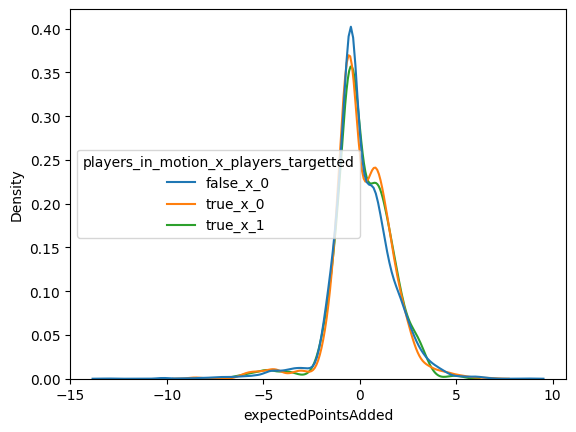

In [46]:
plotting_df = data.\
    plays_df.\
        filter(pl.col("playType") == "pass").\
        filter(pl.col("timeToThrow") != "NA").\
    with_columns(players_in_motion_x_players_targetted= pl.col("playHadPlayersInMotionAtSnap").cast(pl.String) + "_x_" + pl.col("playerInMotionAtSnapWasTargetted").cast(pl.String))

sns.kdeplot(data=plotting_df.collect(), x="expectedPointsAdded", hue="players_in_motion_x_players_targetted", common_norm=False)
# sns.boxplot(data=plotting_df.collect(), x="expectedPointsAdded", y="players_in_motion_x_players_targetted")

We can explore how different teams utilise players in motion

In [61]:
data.\
    plays_df.\
        collect().\
        filter(pl.col("playType") == "pass").\
        filter(pl.col("timeToThrow") != "NA").\
        filter(pl.col("playHadPlayersInMotionAtSnap") == True).\
        filter(pl.col("timeToThrow").cast(pl.Float64) <= 3.5).\
        group_by([pl.col("playType"), pl.col("possessionTeam")]).\
            agg(count=pl.count("playId"), 
                count_targeting_motion_player = (pl.col("playerInMotionAtSnapWasTargetted") == True).sum(),
                count_targeting_non_motion_player = (pl.col("playerInMotionAtSnapWasTargetted") == False).sum(),
                percentage_targeting_motion_player = pl.mean("playerInMotionAtSnapWasTargetted"),
                # Total stats
                total_avg_epa_added=pl.mean("expectedPointsAdded"), 
                total_median_epa_added=pl.mean("expectedPointsAdded"),
                total_completion_percentage=(pl.col("passResult") == "C").mean(),
                total_time_to_throw=pl.col("timeToThrow").cast(pl.Float64).mean(),
                total_pass_length=(pl.col("passLength").cast(pl.Float64)).mean(),
                # Targeting motion
                avg_epa_added_when_targeting_motion_player = pl.col("expectedPointsAdded").filter(pl.col("playerInMotionAtSnapWasTargetted") == True).mean(),
                median_epa_added_when_targeting_motion_player = pl.col("expectedPointsAdded").filter(pl.col("playerInMotionAtSnapWasTargetted") == True).median(),
                completion_percentage_when_targeting_motion_player = (pl.col("passResult") == "C").filter(pl.col("playerInMotionAtSnapWasTargetted") == True).mean(),
                targeting_motion_player_time_to_throw = (pl.col("timeToThrow").cast(pl.Float64)).filter(pl.col("playerInMotionAtSnapWasTargetted") == True).mean(),
                targeting_motion_player_pass_length = (pl.col("passLength").cast(pl.Float64)).filter(pl.col("playerInMotionAtSnapWasTargetted") == True).mean(),
                ).\
        sort("playType", "possessionTeam").\
        sort("avg_epa_added_when_targeting_motion_player", descending=True)

shape: (32, 16)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬────────┐
│ pla ┆ pos ┆ cou ┆ cou ┆ cou ┆ per ┆ tot ┆ tot ┆ tot ┆ tot ┆ tot ┆ avg ┆ med ┆ com ┆ tar ┆ target │
│ yTy ┆ ses ┆ nt  ┆ nt_ ┆ nt_ ┆ cen ┆ al_ ┆ al_ ┆ al_ ┆ al_ ┆ al_ ┆ _ep ┆ ian ┆ ple ┆ get ┆ ing_mo │
│ pe  ┆ sio ┆ --- ┆ tar ┆ tar ┆ tag ┆ avg ┆ med ┆ com ┆ tim ┆ pas ┆ a_a ┆ _ep ┆ tio ┆ ing ┆ tion_p │
│ --- ┆ nTe ┆ u32 ┆ get ┆ get ┆ e_t ┆ _ep ┆ ian ┆ ple ┆ e_t ┆ s_l ┆ dde ┆ a_a ┆ n_p ┆ _mo ┆ layer_ │
│ str ┆ am  ┆     ┆ ing ┆ ing ┆ arg ┆ a_a ┆ _ep ┆ tio ┆ o_t ┆ eng ┆ d_w ┆ dde ┆ erc ┆ tio ┆ pass_l │
│     ┆ --- ┆     ┆ _mo ┆ _no ┆ eti ┆ dde ┆ a_a ┆ n_p ┆ hro ┆ th  ┆ hen ┆ d_w ┆ ent ┆ n_p ┆ …      │
│     ┆ str ┆     ┆ tio ┆ n_m ┆ ng_ ┆ d   ┆ dde ┆ erc ┆ w   ┆ --- ┆ _ta ┆ hen ┆ age ┆ lay ┆ ---    │
│     ┆     ┆     ┆ n_p ┆ oti ┆ mot ┆ --- ┆ d   ┆ ent ┆ --- ┆ f64 ┆ rge ┆ _ta ┆ _wh ┆ er_ ┆ f64    │
│     ┆     ┆     ┆ lay ┆ on_ ┆ ion ┆ f64 ┆ --- ┆ age ┆ f64 ┆     ┆ tin ┆ rge ┆ en_ ┆ tim ┆        │
│     ┆     ┆     ┆ er  ┆ pla ┆ _pl ┆     ┆ f64 ┆ --- ┆     ┆     ┆ g_m ┆ tin ┆ tar ┆ e_t ┆        │
│     ┆     ┆     ┆ --- ┆ …   ┆ …   ┆     ┆     ┆ f64 ┆     ┆     ┆ …   ┆ …   ┆ …   ┆ …   ┆        │
│     ┆     ┆     ┆ u32 ┆ --- ┆ --- ┆     ┆     ┆     ┆     ┆     ┆ --- ┆ --- ┆ --- ┆ --- ┆        │
│     ┆     ┆     ┆     ┆ u32 ┆ f64 ┆     ┆     ┆     ┆     ┆     ┆ f64 ┆ f64 ┆ f64 ┆ f64 ┆        │
╞═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪═════╪════════╡
│ pas ┆ NO  ┆ 21  ┆ 7   ┆ 14  ┆ 0.3 ┆ 0.7 ┆ 0.7 ┆ 0.7 ┆ 2.2 ┆ 7.8 ┆ 0.8 ┆ 0.8 ┆ 0.8 ┆ 1.8 ┆ 4.2857 │
│ s   ┆     ┆     ┆     ┆     ┆ 333 ┆ 357 ┆ 357 ┆ 142 ┆ 972 ┆ 571 ┆ 418 ┆ 606 ┆ 571 ┆ 045 ┆ 14     │
│     ┆     ┆     ┆     ┆     ┆ 33  ┆ 56  ┆ 56  ┆ 86  ┆ 38  ┆ 43  ┆ 27  ┆ 62  ┆ 43  ┆ 71  ┆        │
│ pas ┆ KC  ┆ 127 ┆ 47  ┆ 80  ┆ 0.3 ┆ 0.4 ┆ 0.4 ┆ 0.7 ┆ 2.1 ┆ 4.3 ┆ 0.7 ┆ 0.7 ┆ 0.8 ┆ 1.9 ┆ 3.4893 │
│ s   ┆     ┆     ┆     ┆     ┆ 700 ┆ 841 ┆ 841 ┆ 559 ┆ 847 ┆ 858 ┆ 682 ┆ 109 ┆ 723 ┆ 911 ┆ 62     │
│     ┆     ┆     ┆     ┆     ┆ 79  ┆ 28  ┆ 28  ┆ 06  ┆ 48  ┆ 27  ┆ 93  ┆ 32  ┆ 4   ┆ 49  ┆        │
│ pas ┆ ATL ┆ 41  ┆ 8   ┆ 33  ┆ 0.1 ┆ 0.2 ┆ 0.2 ┆ 0.7 ┆ 2.4 ┆ 7.0 ┆ 0.6 ┆ 0.7 ┆ 0.8 ┆ 2.1 ┆ 0.375  │
│ s   ┆     ┆     ┆     ┆     ┆ 951 ┆ 314 ┆ 314 ┆ 317 ┆ 786 ┆ 243 ┆ 637 ┆ 332 ┆ 75  ┆ 98  ┆        │
│     ┆     ┆     ┆     ┆     ┆ 22  ┆ 17  ┆ 17  ┆ 07  ┆ 83  ┆ 9   ┆ 36  ┆ 73  ┆     ┆     ┆        │
│ pas ┆ PHI ┆ 29  ┆ 4   ┆ 25  ┆ 0.1 ┆ 0.3 ┆ 0.3 ┆ 0.7 ┆ 2.4 ┆ 5.0 ┆ 0.5 ┆ 0.2 ┆ 1.0 ┆ 2.2 ┆ 1.75   │
│ s   ┆     ┆     ┆     ┆     ┆ 379 ┆ 864 ┆ 864 ┆ 586 ┆ 828 ┆ 689 ┆ 061 ┆ 770 ┆     ┆ 927 ┆        │
│     ┆     ┆     ┆     ┆     ┆ 31  ┆ 3   ┆ 3   ┆ 21  ┆ 97  ┆ 66  ┆ 73  ┆ 63  ┆     ┆ 5   ┆        │
│ pas ┆ NYJ ┆ 80  ┆ 26  ┆ 54  ┆ 0.3 ┆ 0.3 ┆ 0.3 ┆ 0.7 ┆ 2.3 ┆ 5.3 ┆ 0.4 ┆ 0.2 ┆ 0.8 ┆ 2.1 ┆ 3.5769 │
│ s   ┆     ┆     ┆     ┆     ┆ 25  ┆ 762 ┆ 762 ┆ 75  ┆ 724 ┆ 625 ┆ 661 ┆ 284 ┆ 076 ┆ 115 ┆ 23     │
│     ┆     ┆     ┆     ┆     ┆     ┆ 25  ┆ 25  ┆     ┆ 13  ┆     ┆ 76  ┆ 64  ┆ 92  ┆ 77  ┆        │
│ pas ┆ TEN ┆ 22  ┆ 3   ┆ 19  ┆ 0.1 ┆ 0.3 ┆ 0.3 ┆ 0.7 ┆ 2.5 ┆ 6.5 ┆ 0.4 ┆ -0. ┆ 0.6 ┆ 2.3 ┆ -0.666 │
│ s   ┆     ┆     ┆     ┆     ┆ 363 ┆ 732 ┆ 732 ┆ 727 ┆ 381 ┆     ┆ 488 ┆ 555 ┆ 666 ┆ 856 ┆ 667    │
│     ┆     ┆     ┆     ┆     ┆ 64  ┆ 99  ┆ 99  ┆ 27  ┆ 36  ┆     ┆ 03  ┆ 06  ┆ 67  ┆ 67  ┆        │
│ pas ┆ NE  ┆ 63  ┆ 23  ┆ 40  ┆ 0.3 ┆ 0.3 ┆ 0.3 ┆ 0.8 ┆ 2.2 ┆ 4.4 ┆ 0.3 ┆ -0. ┆ 0.8 ┆ 1.8 ┆ 2.9130 │
│ s   ┆     ┆     ┆     ┆     ┆ 650 ┆ 267 ┆ 267 ┆ 412 ┆ 809 ┆ 126 ┆ 959 ┆ 055 ┆ 260 ┆ 097 ┆ 43     │
│     ┆     ┆     ┆     ┆     ┆ 79  ┆ 23  ┆ 23  ┆ 7   ┆ 68  ┆ 98  ┆ 42  ┆ 154 ┆ 87  ┆ 83  ┆        │
│ pas ┆ DET ┆ 58  ┆ 10  ┆ 48  ┆ 0.1 ┆ 0.2 ┆ 0.2 ┆ 0.7 ┆ 2.4 ┆ 3.1 ┆ 0.3 ┆ 0.4 ┆ 0.8 ┆ 2.2 ┆ 2.4    │
│ s   ┆     ┆     ┆     ┆     ┆ 724 ┆ 605 ┆ 605 ┆ 068 ┆ 271 ┆ 551 ┆ 670 ┆ 413 ┆     ┆ 639 ┆        │
│     ┆     ┆     ┆     ┆     ┆ 14  ┆ 6   ┆ 6   ┆ 97  ┆ 38  ┆ 72  ┆ 48  ┆ 39  ┆     ┆     ┆        │
│ pas ┆ DEN ┆ 41  ┆ 10  ┆ 31  ┆ 0.2 ┆ 0.0 ┆ 0

In [41]:
data.\
    plays_df.\
        filter(pl.col("playType") == "pass").\
        group_by([pl.col("playType"), pl.col("playHadPlayersInMotionAtSnap"), pl.col("playerInMotionAtSnapWasTargetted")]).\
            agg(count=pl.count("playId"), 
                completion_percentage = (pl.col("passResult") == "C").sum() / pl.count("playId"),
                in_motion_at_snap_target_percentage = pl.mean("playerInMotionAtSnapWasTargetted"),
                avg_yards_gained_after_catch=pl.col("yardsAfterCatch").cast(pl.Float64).mean(),
                avg_epa_added=pl.mean("expectedPointsAdded"), 
                median_epa_added = pl.median("expectedPointsAdded"),
                avg_wp_added = pl.mean("possessionTeamWPAdded"),
                median_wp_added = pl.median("possessionTeamWPAdded")).\
        sort("playType").\
collect()

shape: (3, 11)
┌─────────┬────────┬────────┬───────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ playTyp ┆ playHa ┆ player ┆ count ┆ comple ┆ in_mot ┆ avg_ya ┆ avg_ep ┆ median ┆ avg_wp ┆ median │
│ e       ┆ dPlaye ┆ InMoti ┆ ---   ┆ tion_p ┆ ion_at ┆ rds_ga ┆ a_adde ┆ _epa_a ┆ _added ┆ _wp_ad │
│ ---     ┆ rsInMo ┆ onAtSn ┆ u32   ┆ ercent ┆ _snap_ ┆ ined_a ┆ d      ┆ dded   ┆ ---    ┆ ded    │
│ str     ┆ tionAt ┆ apWasT ┆       ┆ age    ┆ target ┆ fter_c ┆ ---    ┆ ---    ┆ f64    ┆ ---    │
│         ┆ Snap   ┆ argett ┆       ┆ ---    ┆ _perce ┆ atch   ┆ f64    ┆ f64    ┆        ┆ f64    │
│         ┆ ---    ┆ …      ┆       ┆ f64    ┆ …      ┆ ---    ┆        ┆        ┆        ┆        │
│         ┆ bool   ┆ ---    ┆       ┆        ┆ ---    ┆ f64    ┆        ┆        ┆        ┆        │
│         ┆        ┆ u32    ┆       ┆        ┆ f64    ┆        ┆        ┆        ┆        ┆        │
╞═════════╪════════╪════════╪═══════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╡
│ pass    ┆ false  ┆ 0      ┆ 7351  ┆ 0.5649 ┆ 0.0    ┆ 2.8251 ┆ -0.032 ┆ -0.225 ┆ -0.000 ┆ -0.001 │
│         ┆        ┆        ┆       ┆ 57     ┆        ┆ 94     ┆ 469    ┆ 525    ┆ 47     ┆ 025    │
│ pass    ┆ true   ┆ 1      ┆ 566   ┆ 0.7438 ┆ 1.0    ┆ 4.5936 ┆ 0.1545 ┆ -0.091 ┆ 0.0047 ┆ -0.000 │
│         ┆        ┆        ┆       ┆ 16     ┆        ┆ 4      ┆ 19     ┆ 821    ┆ 31     ┆ 485    │
│ pass    ┆ true   ┆ 0      ┆ 1819  ┆ 0.5772 ┆ 0.0    ┆ 3.3045 ┆ 0.0161 ┆ -0.185 ┆ -0.000 ┆ -0.000 │
│         ┆        ┆        ┆       ┆ 4      ┆        ┆ 63     ┆ 37     ┆ 378    ┆ 493    ┆ 87     │
└─────────┴────────┴────────┴───────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘

In [19]:
# This one
data.\
    plays_df.\
        filter(pl.col("playType") == "pass").\
        filter(pl.col("timeToThrow") != "NA").\
        group_by([pl.col("playType"), pl.col("playHadPlayersInMotionAtSnap"), pl.col("playerInMotionAtSnapWasTargetted")]).\
            agg(count=pl.count("playId"), 
                completion_percentage = (pl.col("passResult") == "C").sum() / pl.count("playId"),
                in_motion_at_snap_target_percentage = pl.mean("playerInMotionAtSnapWasTargetted"),
                avg_time_to_throw=pl.col("timeToThrow").cast(pl.Float64).mean(),
                avg_pass_length=pl.col("passLength").cast(pl.Float64).mean(),
                avg_yards_gained_after_catch=pl.col("yardsAfterCatch").cast(pl.Float64).mean(),
                avg_epa_added=pl.mean("expectedPointsAdded"), 
                median_epa_added = pl.median("expectedPointsAdded"),
                avg_wp_added = pl.mean("possessionTeamWPAdded"),
                median_wp_added = pl.median("possessionTeamWPAdded")).\
        sort("playType").\
collect()

shape: (3, 13)
┌─────┬─────┬─────┬───────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ pla ┆ pla ┆ pla ┆ count ┆ comple ┆ in_mo ┆ avg_t ┆ avg_p ┆ avg_y ┆ avg_e ┆ media ┆ avg_w ┆ media │
│ yTy ┆ yHa ┆ yer ┆ ---   ┆ tion_p ┆ tion_ ┆ ime_t ┆ ass_l ┆ ards_ ┆ pa_ad ┆ n_epa ┆ p_add ┆ n_wp_ │
│ pe  ┆ dPl ┆ InM ┆ u32   ┆ ercent ┆ at_sn ┆ o_thr ┆ ength ┆ gaine ┆ ded   ┆ _adde ┆ ed    ┆ added │
│ --- ┆ aye ┆ oti ┆       ┆ age    ┆ ap_ta ┆ ow    ┆ ---   ┆ d_aft ┆ ---   ┆ d     ┆ ---   ┆ ---   │
│ str ┆ rsI ┆ onA ┆       ┆ ---    ┆ rget_ ┆ ---   ┆ f64   ┆ er_ca ┆ f64   ┆ ---   ┆ f64   ┆ f64   │
│     ┆ nMo ┆ tSn ┆       ┆ f64    ┆ perce ┆ f64   ┆       ┆ tch   ┆       ┆ f64   ┆       ┆       │
│     ┆ tio ┆ apW ┆       ┆        ┆ …     ┆       ┆       ┆ ---   ┆       ┆       ┆       ┆       │
│     ┆ nAt ┆ asT ┆       ┆        ┆ ---   ┆       ┆       ┆ f64   ┆       ┆       ┆       ┆       │
│     ┆ Sna ┆ arg ┆       ┆        ┆ f64   ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ p   ┆ ett ┆       ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ --- ┆ …   ┆       ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ boo ┆ --- ┆       ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ l   ┆ u32 ┆       ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
╞═════╪═════╪═════╪═══════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ pas ┆ tru ┆ 0   ┆ 1598  ┆ 0.6570 ┆ 0.0   ┆ 2.865 ┆ 6.833 ┆ 3.761 ┆ 0.142 ┆ -0.02 ┆ 0.002 ┆ -0.00 │
│ s   ┆ e   ┆     ┆       ┆ 71     ┆       ┆ 523   ┆ 542   ┆ 577   ┆ 469   ┆ 481   ┆ 085   ┆ 0101  │
│ pas ┆ fal ┆ 0   ┆ 6541  ┆ 0.6349 ┆ 0.0   ┆ 2.749 ┆ 8.173 ┆ 3.170 ┆ 0.078 ┆ -0.13 ┆ 0.002 ┆ -0.00 │
│ s   ┆ se  ┆     ┆       ┆ 18     ┆       ┆ 326   ┆ 674   ┆ 769   ┆ 694   ┆ 872   ┆ 047   ┆ 0393  │
│ pas ┆ tru ┆ 1   ┆ 566   ┆ 0.7438 ┆ 1.0   ┆ 2.365 ┆ 3.839 ┆ 4.593 ┆ 0.154 ┆ -0.09 ┆ 0.004 ┆ -0.00 │
│ s   ┆ e   ┆     ┆       ┆ 16     ┆       ┆ 917   ┆ 223   ┆ 64    ┆ 519   ┆ 1821  ┆ 731   ┆ 0485  │
└─────┴─────┴─────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┘

In [17]:
data.\
    plays_df.\
        filter(pl.col("playType") == "pass").\
        filter(pl.col("playHadPlayersInMotionAtSnap") == True).\
        filter(pl.col("passLength") != "NA").\
        group_by([pl.col("playType"), pl.col("playHadPlayersInMotionAtSnap"), pl.col("playerInMotionAtSnapWasTargetted")]).\
            agg(count=pl.count("playId"), 
                completion_percentage = (pl.col("passResult") == "C").sum() / pl.count("playId"),
                in_motion_at_snap_target_percentage = pl.mean("playerInMotionAtSnapWasTargetted"),
                avg_time_to_throw=pl.col("timeToThrow").cast(pl.Float64).mean(),
                avg_pass_length=pl.col("passLength").cast(pl.Float64).mean(),
                avg_yards_gained_after_catch=pl.col("yardsAfterCatch").cast(pl.Float64).mean(),
                avg_epa_added=pl.mean("expectedPointsAdded"), 
                median_epa_added = pl.median("expectedPointsAdded"),
                avg_wp_added = pl.mean("possessionTeamWPAdded"),
                median_wp_added = pl.median("possessionTeamWPAdded")).\
        sort("avg_epa_added", descending=True).\
collect()

shape: (2, 13)
┌─────┬─────┬─────┬───────┬────────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┬───────┐
│ pla ┆ pla ┆ pla ┆ count ┆ comple ┆ in_mo ┆ avg_t ┆ avg_p ┆ avg_y ┆ avg_e ┆ media ┆ avg_w ┆ media │
│ yTy ┆ yHa ┆ yer ┆ ---   ┆ tion_p ┆ tion_ ┆ ime_t ┆ ass_l ┆ ards_ ┆ pa_ad ┆ n_epa ┆ p_add ┆ n_wp_ │
│ pe  ┆ dPl ┆ InM ┆ u32   ┆ ercent ┆ at_sn ┆ o_thr ┆ ength ┆ gaine ┆ ded   ┆ _adde ┆ ed    ┆ added │
│ --- ┆ aye ┆ oti ┆       ┆ age    ┆ ap_ta ┆ ow    ┆ ---   ┆ d_aft ┆ ---   ┆ d     ┆ ---   ┆ ---   │
│ str ┆ rsI ┆ onA ┆       ┆ ---    ┆ rget_ ┆ ---   ┆ f64   ┆ er_ca ┆ f64   ┆ ---   ┆ f64   ┆ f64   │
│     ┆ nMo ┆ tSn ┆       ┆ f64    ┆ perce ┆ f64   ┆       ┆ tch   ┆       ┆ f64   ┆       ┆       │
│     ┆ tio ┆ apW ┆       ┆        ┆ …     ┆       ┆       ┆ ---   ┆       ┆       ┆       ┆       │
│     ┆ nAt ┆ asT ┆       ┆        ┆ ---   ┆       ┆       ┆ f64   ┆       ┆       ┆       ┆       │
│     ┆ Sna ┆ arg ┆       ┆        ┆ f64   ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ p   ┆ ett ┆       ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ --- ┆ …   ┆       ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ boo ┆ --- ┆       ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
│     ┆ l   ┆ u32 ┆       ┆        ┆       ┆       ┆       ┆       ┆       ┆       ┆       ┆       │
╞═════╪═════╪═════╪═══════╪════════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╪═══════╡
│ pas ┆ tru ┆ 1   ┆ 566   ┆ 0.7438 ┆ 1.0   ┆ 2.365 ┆ 3.839 ┆ 4.593 ┆ 0.154 ┆ -0.09 ┆ 0.004 ┆ -0.00 │
│ s   ┆ e   ┆     ┆       ┆ 16     ┆       ┆ 917   ┆ 223   ┆ 64    ┆ 519   ┆ 1821  ┆ 731   ┆ 0485  │
│ pas ┆ tru ┆ 0   ┆ 1598  ┆ 0.6570 ┆ 0.0   ┆ 2.865 ┆ 6.833 ┆ 3.761 ┆ 0.142 ┆ -0.02 ┆ 0.002 ┆ -0.00 │
│ s   ┆ e   ┆     ┆       ┆ 71     ┆       ┆ 523   ┆ 542   ┆ 577   ┆ 469   ┆ 481   ┆ 085   ┆ 0101  │
└─────┴─────┴─────┴───────┴────────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┴───────┘

In [54]:
data.\
    plays_df.\
        filter(pl.col("playType") == "pass").\
        filter(pl.col("timeToThrow") != "NA").\
        filter(pl.col("playHadPlayersInMotionAtSnap") == True).\
        filter(pl.col("playerInMotionAtSnapWasTargetted") == 1).\
        filter(pl.col("possessionTeam") == "KC").head(20).collect()

shape: (20, 85)
┌─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┐
│ gam ┆ pla ┆ pla ┆ qua ┆ dow ┆ yar ┆ pos ┆ def ┆ yar ┆ yar ┆ gam ┆ pre ┆ pre ┆ pla ┆ abs ┆ pre ┆ pre ┆ exp ┆ off ┆ rec ┆ pla ┆ pas ┆ pas ┆ tar ┆ tar ┆ pla ┆ dro ┆ dro ┆ pas ┆ tim ┆ tim ┆ tim ┆ pas ┆ unb ┆ qbS ┆ qbK ┆ qbS ┆ rus ┆ pen ┆ pre ┆ yar ┆ hom ┆ vis ┆ exp ┆ isD ┆ pff ┆ pff ┆ pff ┆ pff ┆ pff ┆ sea ┆ wee ┆ gam ┆ gam ┆ hom ┆ vis ┆ hom ┆ vis ┆ dis ┆ pla ┆ pre ┆ pre ┆ pre ┆ pre ┆ pos ┆ def ┆ def ┆ sco ┆ pos ┆ pos ┆ pos ┆ pla ┆ pla ┆ pla ┆ pla ┆ pla ┆ pla ┆ pla ┆ pla ┆ pla ┆ pla ┆ yar ┆ def ┆ def ┆ def │
│ eId ┆ yId ┆ yDe ┆ rte ┆ n   ┆ dsT ┆ ses ┆ ens ┆ dli ┆ dli ┆ eCl ┆ Sna ┆ Sna ┆ yNu ┆ olu ┆ Sna ┆ Sna ┆ ect ┆ ens ┆ eiv ┆ yCl ┆ sRe ┆ sLe ┆ get ┆ get ┆ yAc ┆ pba ┆ pba ┆ sLo ┆ eTo ┆ eIn ┆ eTo ┆ sTi ┆ loc ┆ pik ┆ nee ┆ nea ┆ hLo ┆ alt ┆ Pen ┆ dsG ┆ eTe ┆ ito ┆ ect ┆ rop ┆ _ru ┆ _ru ┆ _ru ┆ _pa ┆ _ma ┆ son ┆ k   ┆ eDa ┆ eTi ┆ eTe ┆ ito ┆ eFi ┆ ito ┆ tan ┆ yTy ┆ Sna ┆ Sna ┆ Sna ┆ Sna ┆ ses ┆ ens ┆ ens ┆ reD ┆ ses ┆ ses ┆ ses ┆ yNu ┆ yHa ┆ yHa ┆ yHa ┆ yHa ┆ yHa ┆ yer ┆ yer ┆ yer ┆ yMo ┆ dsA ┆ ens ┆ ens ┆ ens │
│ --- ┆ --- ┆ scr ┆ r   ┆ --- ┆ oGo ┆ sio ┆ ive ┆ neS ┆ neN ┆ ock ┆ pHo ┆ pVi ┆ lli ┆ teY ┆ pHo ┆ pVi ┆ edP ┆ eFo ┆ erA ┆ ock ┆ sul ┆ ngt ┆ X   ┆ Y   ┆ tio ┆ ckT ┆ ckD ┆ cat ┆ Thr ┆ Tac ┆ Sac ┆ ppe ┆ ked ┆ e   ┆ l   ┆ k   ┆ cat ┆ yYa ┆ alt ┆ ain ┆ amW ┆ rTe ┆ edP ┆ bac ┆ nCo ┆ nCo ┆ nPa ┆ ssC ┆ nZo ┆ --- ┆ --- ┆ te  ┆ meE ┆ amA ┆ rTe ┆ nal ┆ rFi ┆ ceT ┆ pe  ┆ pPo ┆ pDe ┆ pPo ┆ pDe ┆ sio ┆ ive ┆ ive ┆ iff ┆ sio ┆ sio ┆ sio ┆ mTa ┆ dPl ┆ dPl ┆ dPl ┆ dMo ┆ dPr ┆ Mot ┆ InM ┆ Pre ┆ tio ┆ fte ┆ ive ┆ ive ┆ ive │
│ i64 ┆ i64 ┆ ipt ┆ --- ┆ i64 ┆ --- ┆ nTe ┆ Tea ┆ ide ┆ umb ┆ --- ┆ meS ┆ sit ┆ fie ┆ ard ┆ meT ┆ sit ┆ oin ┆ rma ┆ lig ┆ AtS ┆ t   ┆ h   ┆ --- ┆ --- ┆ n   ┆ ype ┆ ist ┆ ion ┆ ow  ┆ kle ┆ k   ┆ dAt ┆ Pre ┆ --- ┆ --- ┆ --- ┆ ion ┆ rds ┆ yYa ┆ ed  ┆ inP ┆ amW ┆ oin ┆ k   ┆ nce ┆ nce ┆ ssO ┆ ove ┆ ne  ┆ i64 ┆ i64 ┆ --- ┆ ast ┆ bbr ┆ amA ┆ Sco ┆ nal ┆ oEn ┆ --- ┆ sse ┆ fen ┆ sse ┆ fen ┆ nTe ┆ Tea ┆ Tea ┆ ere ┆ nTe ┆ nTe ┆ nTe ┆ rge ┆ aye ┆ aye ┆ aye ┆ tio ┆ eSn ┆ ion ┆ oti ┆ Sna ┆ nTy ┆ rCa ┆ Tea ┆ Tea ┆ Tea │
│     ┆     ┆ ion ┆ i64 ┆     ┆ i64 ┆ am  ┆ m   ┆ --- ┆ er  ┆ str ┆ cor ┆ orS ┆ dBy ┆ lin ┆ eam ┆ orT ┆ ts  ┆ tio ┆ nme ┆ nap ┆ --- ┆ --- ┆ str ┆ str ┆ --- ┆ --- ┆ anc ┆ Typ ┆ --- ┆ Box ┆ --- ┆ Lin ┆ ssu ┆ str ┆ i64 ┆ str ┆ Typ ┆ --- ┆ rds ┆ --- ┆ rob ┆ inP ┆ tsA ┆ --- ┆ ptP ┆ ptS ┆ pti ┆ rag ┆ --- ┆     ┆     ┆ str ┆ ern ┆ --- ┆ bbr ┆ re  ┆ Sco ┆ dzo ┆ str ┆ ssi ┆ siv ┆ ssi ┆ siv ┆ amW ┆ mWP ┆ mEx ┆ nce ┆ amN ┆ amN ┆ amN ┆ ted ┆ rsI ┆ rsM ┆ rsS ┆ nAn ┆ apM ┆ Cam ┆ onA ┆ pMo ┆ pe  ┆ tch ┆ mNu ┆ mNu ┆ mNu │
│     ┆     ┆ --- ┆     ┆     ┆     ┆ --- ┆ --- ┆ str ┆ --- ┆     ┆ e   ┆ cor ┆ Pen ┆ eNu ┆ Win ┆ eam ┆ --- ┆ n   ┆ nt  ┆ --- ┆ str ┆ str ┆     ┆     ┆ boo ┆ str ┆ e   ┆ e   ┆ str ┆ --- ┆ str ┆ e   ┆ re  ┆     ┆     ┆     ┆ e   ┆ str ┆ Gai ┆ i64 ┆ abi ┆ rob ┆ dde ┆ boo ┆ rim ┆ eco ┆ on  ┆ e   ┆ str ┆     ┆     ┆     ┆ --- ┆ str ┆ --- ┆ --- ┆ re  ┆ ne  ┆     ┆ onT ┆ eTe ┆ onT ┆ eTe ┆ PAd ┆ Add ┆ pec ┆ --- ┆ umP ┆ umP ┆ umP ┆ Rec ┆ nMo ┆ oti ┆ hif ┆ dCa ┆ oti ┆ eSe ┆ tSn ┆ tio ┆ --- ┆ --- ┆ mPl ┆ mPl ┆ mPl │
│     ┆     ┆ str ┆     ┆     ┆     ┆ str ┆ str ┆     ┆ i64 ┆     ┆ --- ┆ e   ┆ alt ┆ mbe ┆ Pro ┆ Win ┆ f64 ┆ --- ┆ --- ┆ i64 ┆     ┆     ┆     ┆     ┆ l   ┆     ┆ --- ┆ --- ┆     ┆ str ┆     ┆ --- ┆ --- ┆     ┆     ┆     ┆ --- ┆     ┆ ned ┆     ┆ lit ┆ ili ┆ d   ┆ l   ┆ ary ┆ nda ┆ --- ┆ --- ┆     ┆     ┆     ┆     ┆ str ┆     ┆ str ┆ i64 ┆ --- ┆ --- ┆     ┆ eam ┆ amS ┆ eam ┆ amW ┆ ded ┆ ed  ┆ te

In [63]:
play = PlotPlayVertical(data.tracking_data.filter((pl.col("gameId") == 2022101000) & (pl.col("playId") == 2709)).collect())
play.animate_play()